# Homework 3

For Homework 3, we are asked to make data visualizations for 9 different stocks. 

I chose three stocks from three different industries.

**Streaming Services**

- Disney *(DIS)*
    - Historically a Blue-Chip stock, has ventured into streaming services through their product Disney+
- Netflix *(NFLX)*
    - Originally offering physical media for rent over mail, it became the first streaming service to come into widespread use.
- Comcast *(CMCSA)*
    - Until recently, a traditional telecommunications company, but has recently introduced the Peakock streaming service.
    
**Industrial**
- General Electric *(GE)*
    - Produces a widespread array of consumer durables, as well as manufacturing technologies
- Boeing *(BA)*
    - Manufactures airplanes and aerospace technology for both consumer and military use
- Boston Dynamics *(BSX)*
    - Innovates in robotics technology for both industrial and military use
    
**Automotive**
- General Motors *(GM)*
    - Produces Chevrolet, Buick, and Cadillac branded automobiles
- Ford *(F)*
    - Produces Ford branded automobiles
- Chrysler *(FCAU)*
    - Produces Chrysler and Fiat branded automobiles
    
By choosing 3 stocks from each of these industries, we can compare stocks within each industry against each other, as well guage general industry trends.

In [36]:
## First Define our statistical functions. This comparable to the group project.

def total(list_obj):
    total = 0
    n = len(list_obj)
    for val in list_obj:
        total = total + val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index:upper_middle_index + 1])
    
    return median_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / (n *  SD_ ** 3) if not sample else n * skew / ((n-1) * (n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [37]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df} 
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["Mean"] = round(mean(val), 2)
        dct[key]["Median"] = round(median(val), 2)
        dct[key]["Variance"] = round(variance(val), 2)
        dct[key]["S.D."] = round(SD(val, sample), 2)
        dct[key]["Skewness"] = round(skewness(val), 2)
        dct[key]["Kurtosis"] = round(kurtosis(val), 2)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [38]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2018, 9, 27) #year, month, day
end = datetime.datetime.today()

data_dict = {} #Creating an empty dictionary to fill
stocks = ["DIS", "NFLX", "CMCSA", "GE", "BA", "BSX", "GM", "F", "FCAU"]
#Disney, Netflix, Comcast, General Electric, Boeing, Boston Dynamics, General Mortors, Ford, Diamler-Chrysler
for name in stocks:
    # web.DataReader(stockname, source, start_date, end_date)
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

In [39]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1) #Lists of close data
close_data

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
Date,,,,,,,,,
2018-09-27,116.040001,380.709991,35.220001,11.086538,367.390015,38.340000,33.669998,9.23,17.910000
2018-09-28,116.940002,374.130005,35.410000,10.855769,371.899994,38.500000,33.669998,9.25,17.510000
2018-10-01,116.239998,381.429993,35.520000,11.625000,382.290009,38.980000,34.200001,9.32,17.990000
2018-10-02,117.660004,377.140015,35.700001,11.846154,386.369995,39.040001,33.299999,9.20,17.879999
2018-10-03,116.910004,377.049988,35.189999,12.000000,392.299988,38.610001,34.000000,9.13,17.700001
...,...,...,...,...,...,...,...,...,...
2020-09-21,125.410004,487.350006,44.680000,6.350000,156.350006,38.549999,30.000000,6.87,11.830000
2020-09-22,127.209999,491.170013,46.189999,6.250000,156.800003,38.599998,29.440001,6.78,12.000000
2020-09-23,123.279999,470.609985,45.360001,6.110000,151.179993,37.720001,29.340000,6.64,11.960000


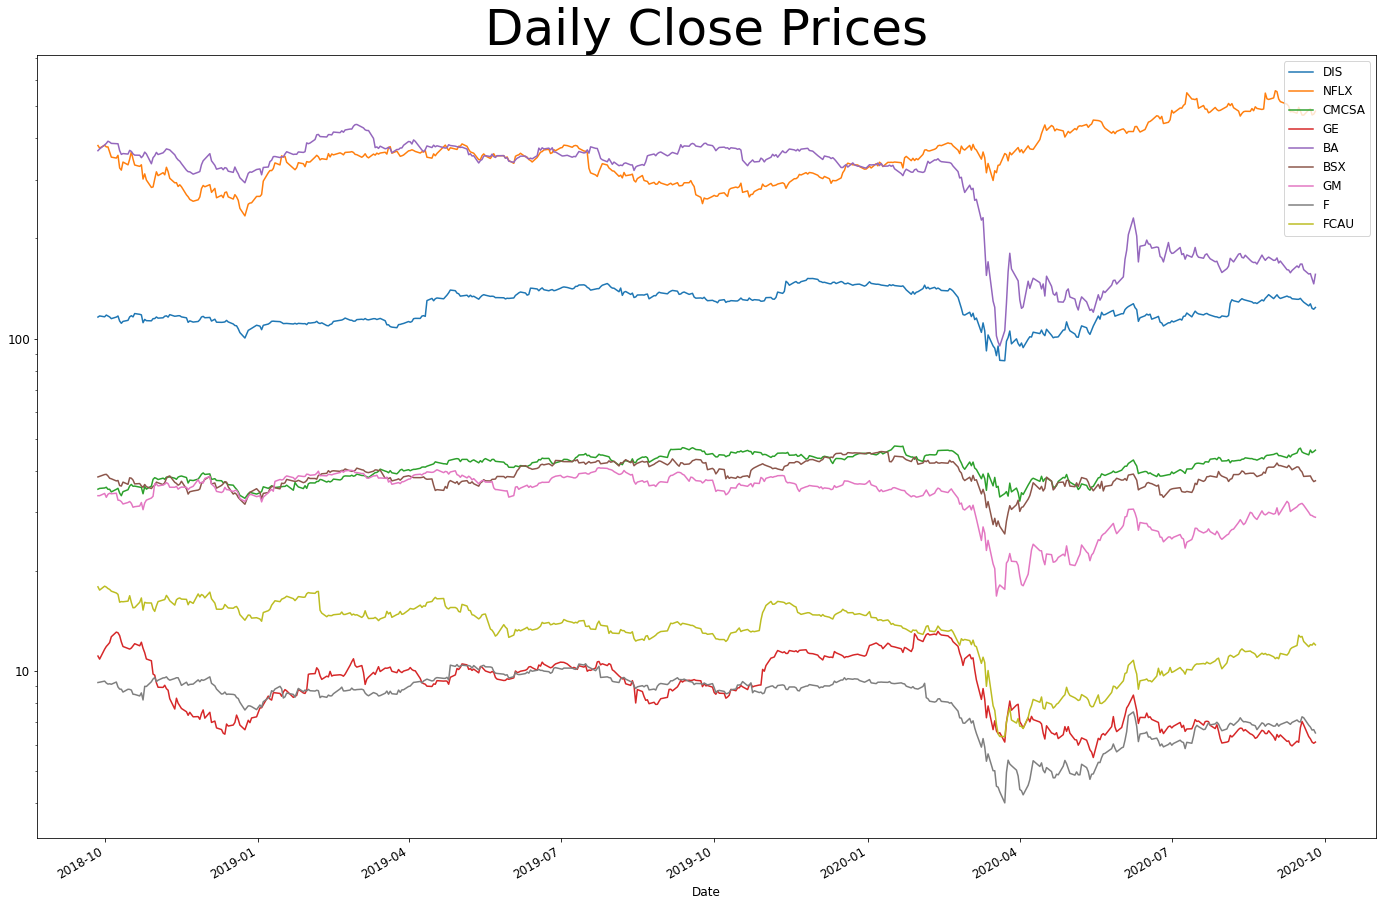

In [40]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 12}) #Set Font Size

fig, ax = plt.subplots(figsize = (24, 16)) #Create  Plot
close_data.plot.line(ax = ax, legend = True)

ax.set_yscale("log") #Set our scale as log. Log changes are percentage changes

#For cleanliness, we set 10^2 and 10^3 as their actual values
y_vals = ax.get_yticks()
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]
ax.set_yticklabels(reformat_values)


plt.title("Daily Close Prices", fontsize = 50)
plt.show()
plt.close()

# Observation

With the exception of Netflix, each stock went down in late March. A possible explanation is, that with alternative forms of entertainment unavailable due to COVID guidance, investors believed more consumers would switch to Netflix' at home streaming. Disney and Comcast took an initial loss, but eventually leveled to approximately their previous values. The other stocks did rise, but some not to the level of the March structural break.

In [41]:
price_change_data = close_data.pct_change() * 100
price_change_data

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
Date,,,,,,,,,
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,0.775596,-1.728346,0.539462,-2.081526,1.227573,0.417318,0.000000,0.216690,-2.233387
2018-10-01,-0.598601,1.951190,0.310648,7.085917,2.793766,1.246752,1.574109,0.756753,2.741288
2018-10-02,1.221615,-1.124709,0.506758,1.902402,1.067249,0.153929,-2.631583,-1.287552,-0.611454
2018-10-03,-0.637430,-0.023871,-1.428577,1.298698,1.534796,-1.101435,2.102104,-0.760866,-1.006702
...,...,...,...,...,...,...,...,...,...
2020-09-21,-2.503305,3.700318,-1.281480,-7.703491,-2.972566,0.181912,-4.761905,-4.979255,-3.507343
2020-09-22,1.435289,0.783832,3.379584,-1.574802,0.287814,0.129700,-1.866665,-1.310039,1.437025
2020-09-23,-3.089380,-4.185929,-1.796922,-2.239998,-3.584190,-2.279786,-0.339675,-2.064902,-0.333333


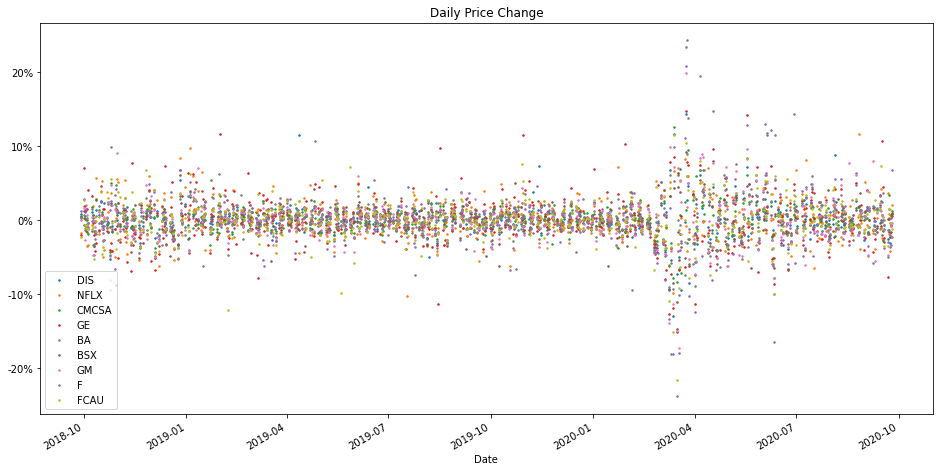

In [42]:
plt.rcParams.update({"font.size": 10})
fig, ax = plt.subplots(figsize = (16, 8))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".",markersize = 3, ls = "", ax = ax) #plots points
plt.legend(loc = "lower left")
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
reformat_y_vals =[str(int(y)) + "%" for y in y_vals] #Add percentage in string
ax.set_yticklabels(reformat_y_vals)
plt.show()
plt.close()

## Observation

The most obvious observation is the structural break in late March. This is a general trend amongst all 9 stocks, but Boston Dynamics seemed to see a larger increase in variance than in the previous Time series data. I can only attribute this to the increased uncertainty after COVID-19. This structural break likely makes our summary statistics less reliable or representative of the recent past.

In [43]:
stats_df = gather_statistics(price_change_data)
stats_df

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
mean,0.04,0.09,0.07,-0.06,-0.09,0.02,0.01,-0.03,-0.04
median,0.03,-0.01,0.09,-0.27,-0.10,0.16,0.06,-0.11,-0.07
variance,5.11,7.58,3.66,12.04,16.16,5.13,8.56,7.80,8.55
S.D.,2.26,2.75,1.91,3.47,4.02,2.27,2.93,2.79,2.92
skewness,0.00,0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00
kurtosis,12.72,5.08,9.70,5.82,13.72,8.26,12.43,15.24,11.79


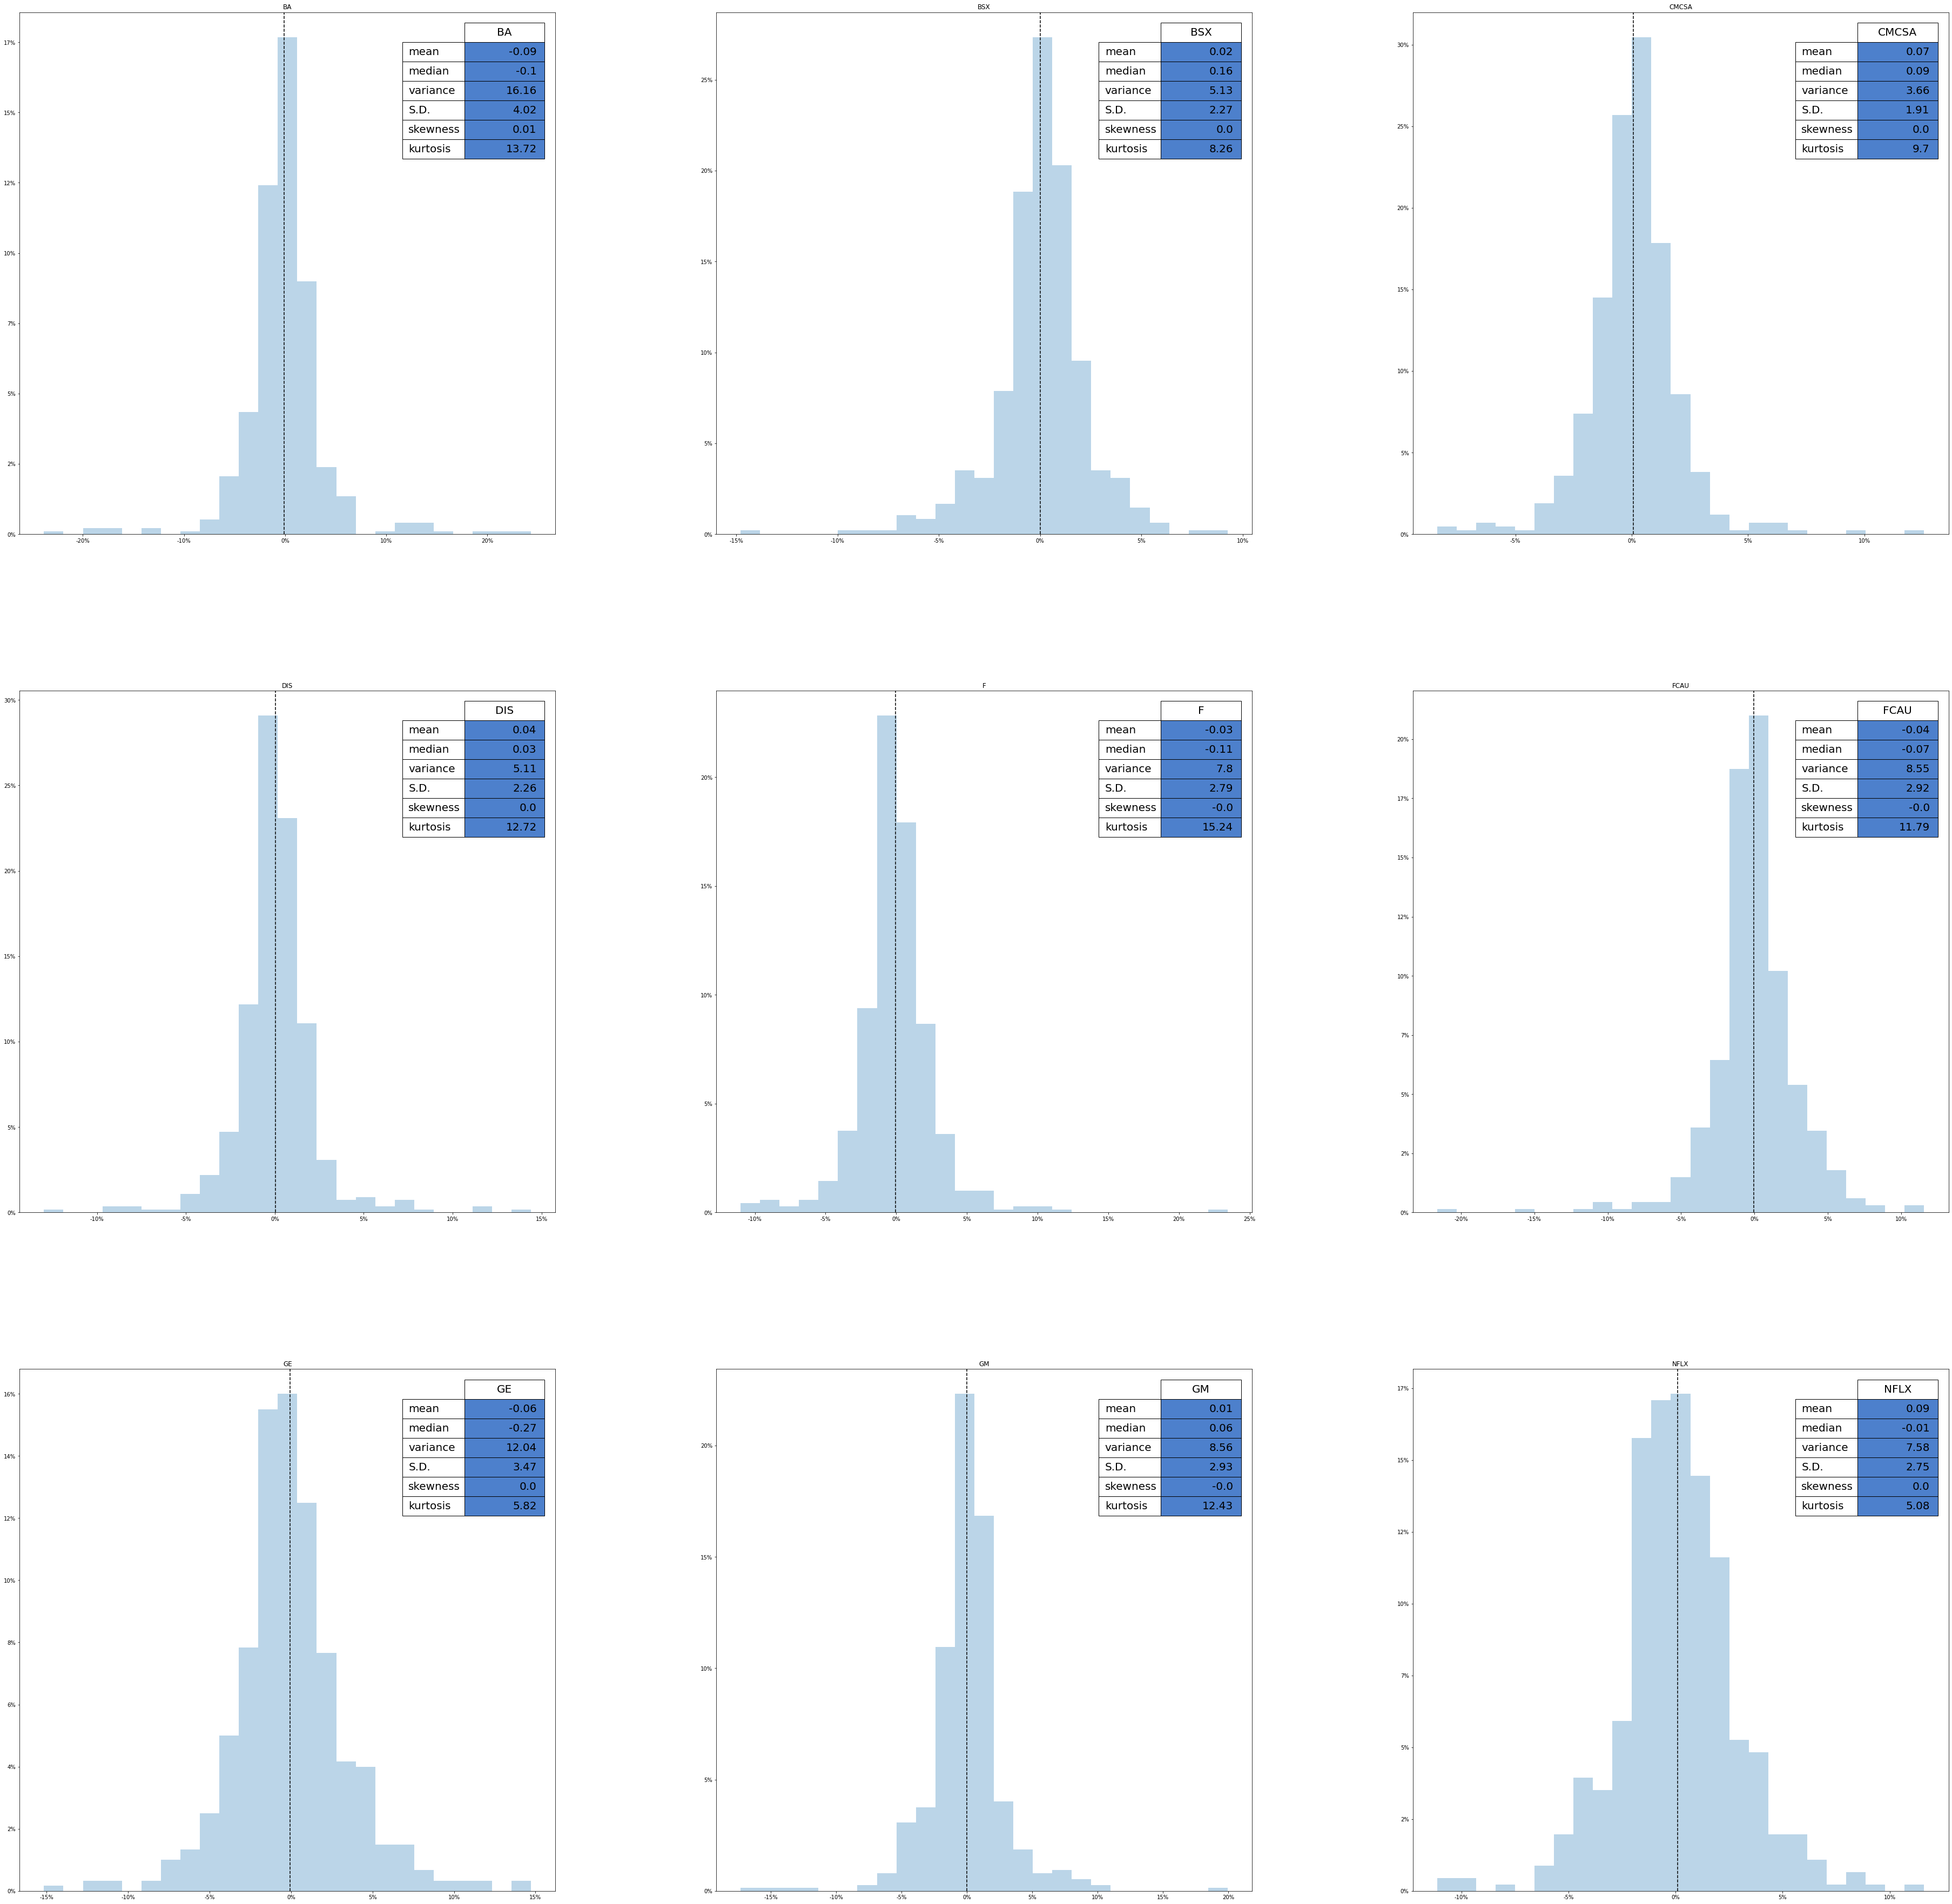

In [44]:
from pandas.plotting import table

# we have 9 graphs to plot, so are sublots are 3x3
fig, ax = plt.subplots(3,3, figsize = (64,64))
price_change_data.hist(bins = 25, alpha = .3, ax = ax,
                       label = price_change_data.keys(),
                       density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        summ_data = stats_df[stock]
        # plot summary statistics within the histogram plot
        stats = table(a, summ_data, 
                      colWidths=[.1],
                      #Making cells a a strong blue, I like it aethetically given the muted blues in graph
                      # terms of (r, g, b)
                      cellColours=[[(.3, .5, .8)]]*6,
                     loc ="upper right")
        # make the table larger (xscale, yscale)
        stats.scale(1.5, 3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean with a vertical line
        a.axvline(x = summ_data.loc["mean"], ls="--", 
                  color = "k")

        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)

plt.show()
plt.close()

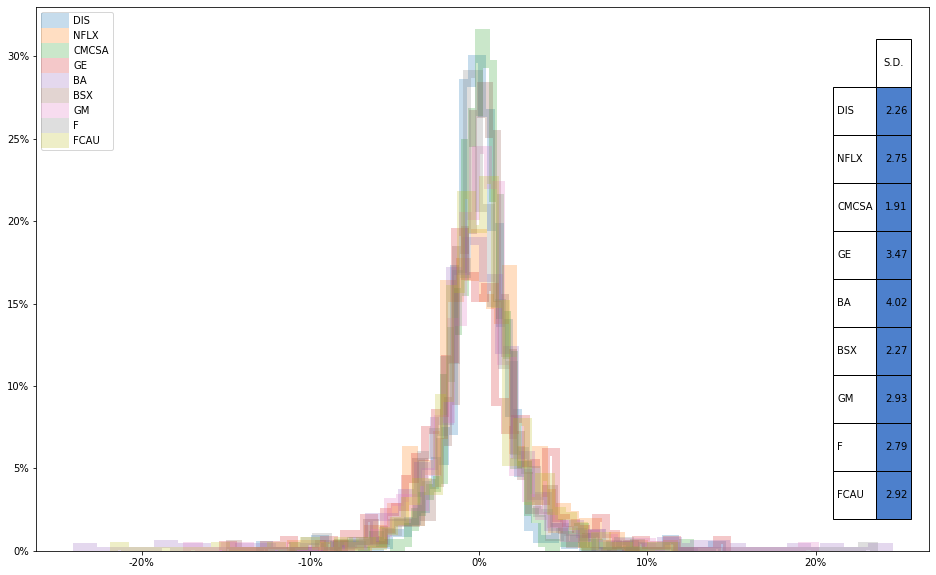

In [45]:
fig, ax = plt.subplots(figsize = (16, 10))
for key in price_change_data:
    price_change_data[key].hist(bins=50, histtype = "step", 
                                 alpha = .25, label = key, linewidth = 8,
                                density = True)
# horzontal values as %
x_vals = ax.get_xticks()
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)
# vert as %
y_vals = ax.get_yticks()
y_vals = [str(int(y * 100))+ "%" for y in y_vals]
ax.set_yticklabels(y_vals)
stats = table(ax, stats_df.loc["S.D."], colWidths=[.05],
             cellColours=[[(.3, .5, .8)]]*9, loc = "center right")
# stats.scale(x, y) rescales dimension x and y in table
stats.scale(.8, 4)
ax.grid(False)
# legend draws from label values passed in df.hist()
plt.legend(loc = "upper left")

# Observation

In the 9 stock case, the visualization itself is a little bit harder to interpret. But from our summary statistics, we can say GM and Boeing had the highest variance in prices, and our three companies involved in video streaming services had the highest mean returns.

That said, the obvious shift in the standard errors that occured in the spring of 2020 calls into question how representative our summary statistics are at this point in time. 

# *Addendum: How do the results change if we narrow our time series?*

As mentioned in our previous observations, the variance of the data shows an obvious change in March. For this purpose, I have ran this again - this time starting the time series in March.

In [46]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df} 
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["Mean"] = round(mean(val), 2)
        dct[key]["Median"] = round(median(val), 2)
        dct[key]["Variance"] = round(variance(val), 2)
        dct[key]["S.D."] = round(SD(val, sample), 2)
        dct[key]["Skewness"] = round(skewness(val), 2)
        dct[key]["Kurtosis"] = round(kurtosis(val), 2)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [47]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2020, 3, 1) 
end = datetime.datetime.today()

data_dict = {} #Creating an empty dictionary to fill
stocks = ["DIS", "NFLX", "CMCSA", "GE", "BA", "BSX", "GM", "F", "FCAU"]
#Disney, Netflix, Comcast, General Electric, Boeing, Boston Dynamics, General Mortors, Ford, Diamler-Chrysler
for name in stocks:
    # web.DataReader(stockname, source, start_date, end_date)
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

In [48]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1) #Lists of close data
close_data

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
Date,,,,,,,,,
2020-03-02,119.980003,381.049988,42.520000,11.21,289.269989,38.270000,31.420000,7.20,12.34
2020-03-03,116.449997,368.769989,41.439999,10.88,280.619995,37.230000,30.520000,6.97,12.00
2020-03-04,119.180000,383.790009,42.500000,10.95,283.119995,38.750000,31.530001,7.08,12.38
2020-03-05,113.980003,372.779999,40.770000,10.08,260.369995,37.459999,30.100000,6.74,11.91
2020-03-06,115.269997,368.970001,40.369999,9.40,262.329987,37.599998,28.690001,6.49,11.83
...,...,...,...,...,...,...,...,...,...
2020-09-21,125.410004,487.350006,44.680000,6.35,156.350006,38.549999,30.000000,6.87,11.83
2020-09-22,127.209999,491.170013,46.189999,6.25,156.800003,38.599998,29.440001,6.78,12.00
2020-09-23,123.279999,470.609985,45.360001,6.11,151.179993,37.720001,29.340000,6.64,11.96


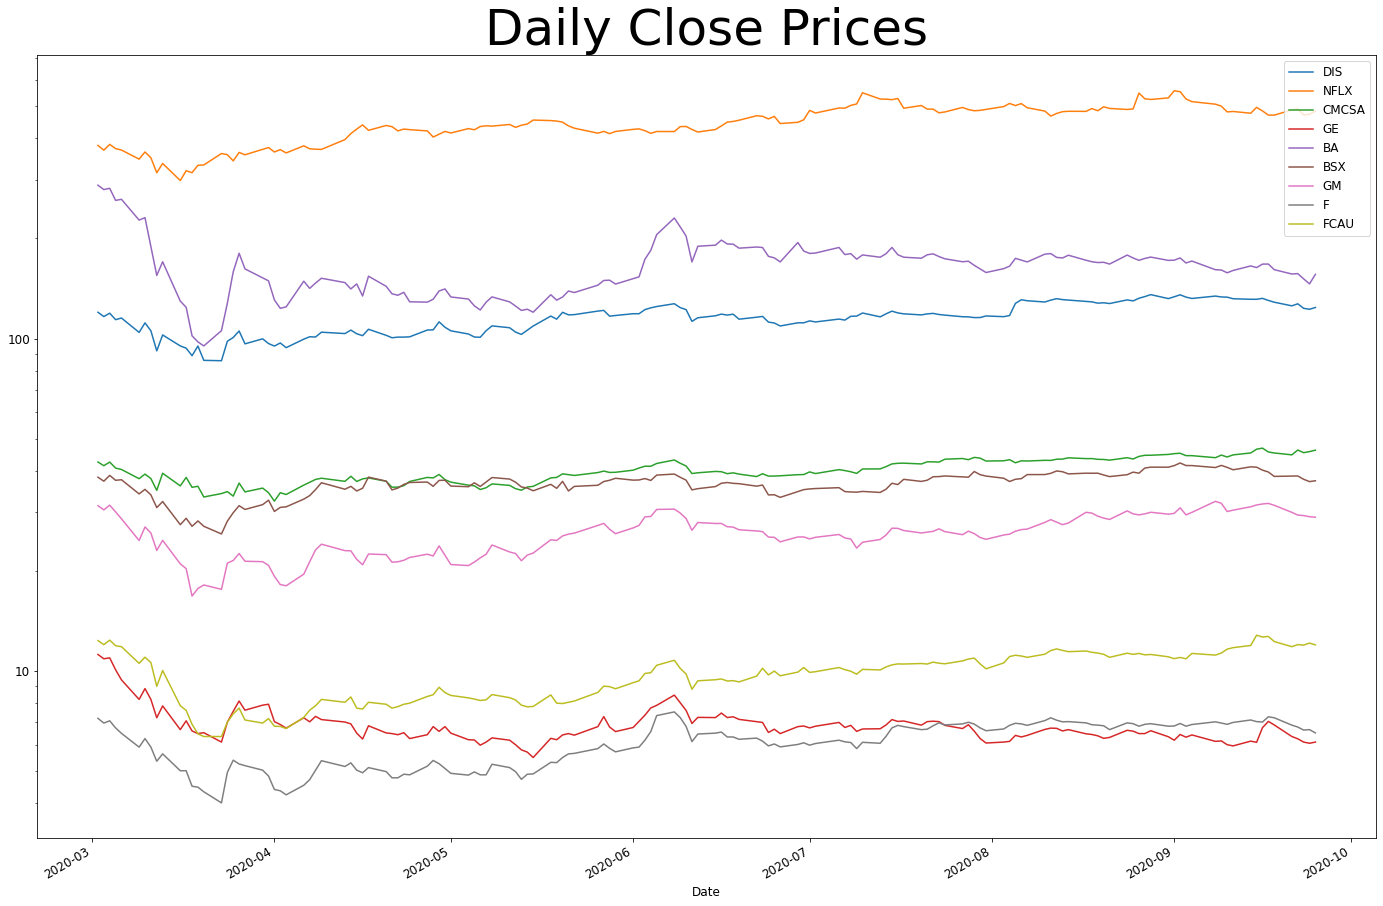

In [49]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 12}) #Set Font Size

fig, ax = plt.subplots(figsize = (24, 16)) #Create 
close_data.plot.line(ax = ax, legend = True)

ax.set_yscale("log") #Set our scale as log. Log changes are percentage changes

#For cleanliness, we set 10^2 and 10^3 as their actual values
y_vals = ax.get_yticks()
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]
# set axis labels with reformat_values instead of existing values
ax.set_yticklabels(reformat_values)




plt.title("Daily Close Prices", fontsize = 50)
#show visualization
plt.show()
# close
plt.close()

In [50]:
price_change_data = close_data.pct_change() * 100
price_change_data

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
Date,,,,,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,-2.942162,-3.222674,-2.539985,-2.943799,-2.990284,-2.717536,-2.864416,-3.194445,-2.755269
2020-03-04,2.344357,4.073005,2.557918,0.643380,0.890884,4.082730,3.309306,1.578194,3.166668
2020-03-05,-4.363146,-2.868759,-4.070587,-7.945205,-8.035462,-3.329035,-4.535364,-4.802262,-3.796448
2020-03-06,1.131772,-1.022050,-0.981117,-6.746035,0.752772,0.373730,-4.684385,-3.709199,-0.671704
...,...,...,...,...,...,...,...,...,...
2020-09-21,-2.503305,3.700318,-1.281480,-7.703491,-2.972566,0.181912,-4.761905,-4.979255,-3.507343
2020-09-22,1.435289,0.783832,3.379584,-1.574802,0.287814,0.129700,-1.866665,-1.310039,1.437025
2020-09-23,-3.089380,-4.185929,-1.796922,-2.239998,-3.584190,-2.279786,-0.339675,-2.064902,-0.333333


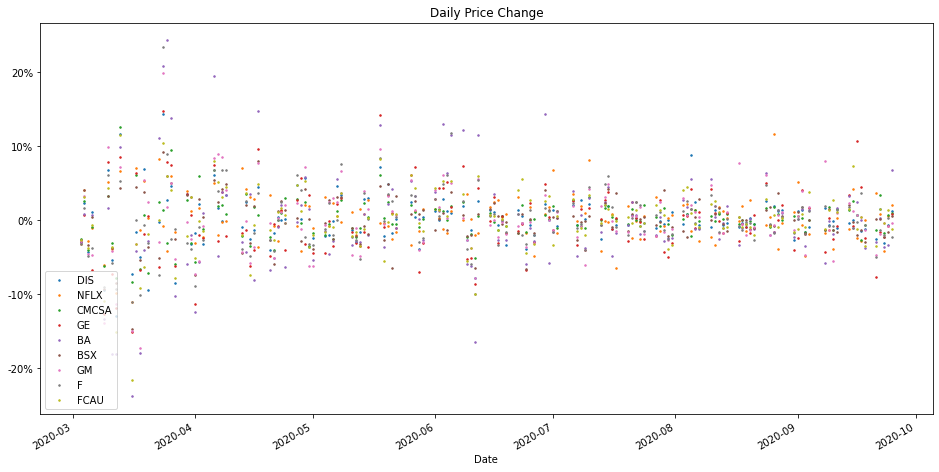

In [51]:
plt.rcParams.update({"font.size": 10})
fig, ax = plt.subplots(figsize = (16, 8))

for key in price_change_data:
    price_change_data[key].plot.line(marker = ".",markersize = 3, ls = "", ax = ax)
plt.legend(loc = "lower left")
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
reformat_y_vals =[str(int(y)) + "%" for y in y_vals]
ax.set_yticklabels(reformat_y_vals)
plt.show()
plt.close()

In [52]:
stats_df = gather_statistics(price_change_data)
stats_df

,DIS,NFLX,CMCSA,GE,BA,BSX,GM,F,FCAU
Mean,0.08,0.22,0.10,-0.31,-0.19,0.04,0.06,0.02,0.07
Median,-0.02,-0.03,0.12,-0.60,-0.71,0.13,-0.13,-0.41,0.21
Variance,12.07,10.43,7.86,22.08,46.09,10.72,22.17,18.27,17.70
S.D.,3.47,3.23,2.80,4.70,6.79,3.27,4.71,4.27,4.21
Skewness,0.00,0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00
Kurtosis,6.64,4.71,6.57,4.18,5.77,5.69,6.14,8.66,8.27


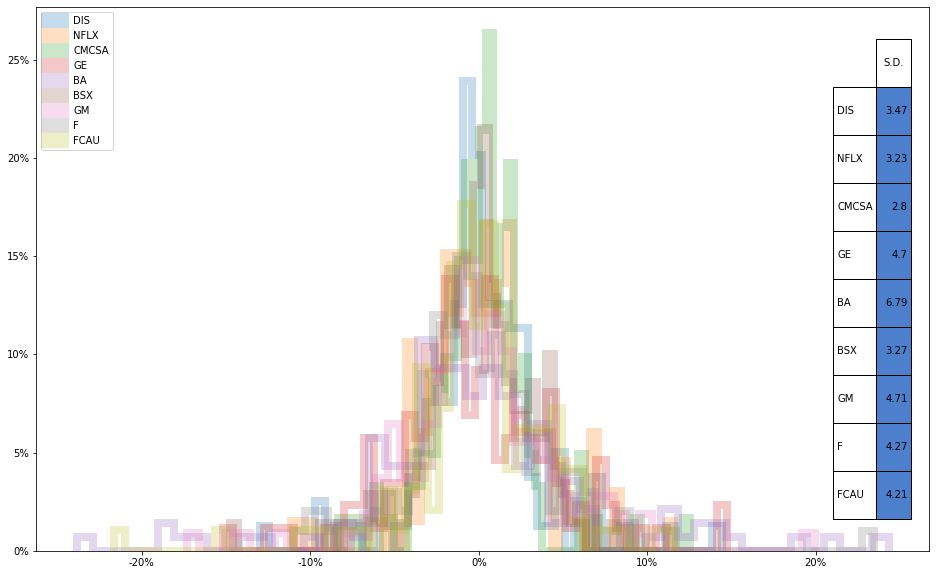

In [54]:
fig, ax = plt.subplots(figsize = (16, 10))
for key in price_change_data:
    price_change_data[key].hist(bins=50, histtype = "step", 
                                 alpha = .25, label = key, linewidth = 8,
                                density = True)
x_vals = ax.get_xticks()
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)
y_vals = ax.get_yticks()
y_vals = [str(int(y * 100))+ "%" for y in y_vals]
ax.set_yticklabels(y_vals)
# table of sds
stats = table(ax, stats_df.loc["S.D."], colWidths=[.05],
             cellColours=[[(.3, .5, .8)]]*9, loc = "center right")
stats.scale(.8, 4)
ax.grid(False)
# legend draws from label values passed in df.hist()
plt.legend(loc = "upper left")

# Observation

From our summary statistics, we can see that the streaming services did well in this period, whereas the industrial and automotive stocks either suffered heavily or only gained marginal returns. In addition, the variance for all the stocks chosen increased compared to our previous example.